Real Helmholtz Separation Plus 4mm
==================================

This uses the FEMME model RHelmS0p2 which puts point 1A/mm2 currents through 2cm tall by 0.8cm thick coils centered at x=50cm, y=$\pm$25.2cm in a 1m radius sphere with 'infinite' boundary. The coils are separated an extra 4mm above the perfect center to center spacing. We are testing to see if this makes the central region more uniform.

This uses data from files written by Python which in turn controlled FEMME to do the real work. It should work anywhere so long as a dummy version of femm.py is available to
silence import errors from FieldGrids.

Start by loading some tools, including a set of FieldTools written specially for this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import femm

In [2]:
import FieldGrids as fp

We build a VectorField and load data into from the model. At the moment we have to start by building a grid describing the data we are loading.

In [3]:
dg = fp.Grid(xlow=0.0, dx=0.1, xhigh=15.0, ylow=-15.0, dy=0.1, yhigh=15.0)
bs0 = fp.VectorField(dg)
bs0.LoadFemmFile('RHelmS0p4.txt')

Just to prove the point, let's plot the data.

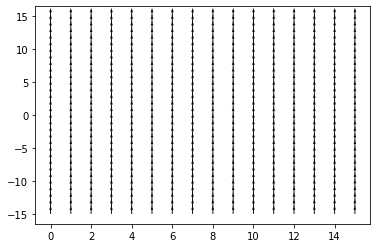

In [4]:
bs0.VPlot(10)

That looks sensible, if not very revealing.

Visualizing the Non-Uniformity
------------------------------

As before, we can get a look at the wiggles if we blow up the x component of the field and do a stream plot.

<AxesSubplot:>

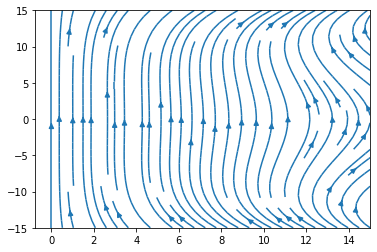

In [5]:
zbs0 = fp.VectorField(bs0)
zbs0.u *= 100
zbs0.StreamPlot()

Well, to my eye that it totally undistinguishable from the pure Helmholtz version. GOOD.

Let's probe into the non-uniformity using the same technique that we used on the pure fields.

The Non-Uniform Part of the Field
---------------------------------

A more instructive view is to look at the magnitude of the difference between this field magnitude and a uniform field matching the center value. I start by constructing this difference field and scale it to the central field. This gives us values which are fractional deviations from the central field. They are easier to interpret.

<Axes3DSubplot:>

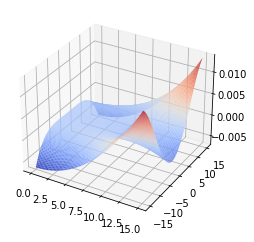

In [6]:
bmag = bs0.Mag()
B0 = bmag.u[150,0]
bs0diff = fp.ScalarField(bmag)
bs0diff.u = bs0diff.u - B0
bs0diff.u /= B0
bs0diff.Splot(2)

So that agrees with the previous plot and we can now look it at in a contour plot with logarithmic contour levels, which should strongly resemble the previous contour plot.

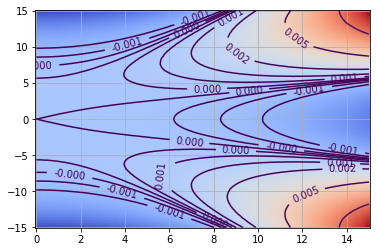

In [7]:
levels = [-1e-3, -5e-4, -2e-4, 0, 2e-4,5e-4,1e-3,2e-3,5e-3,1e-2,2e-2,5e-2,1e-1,2e-1]
cax = bs0diff.Cplot(levels)
cax.grid(axis='both')

Once again, this is indistinguishable from the pure Helmholtz field. I am going to call this a win! For the sake of future comparisons let's redo this with the 5-10cm radii circles added and with the graph axis ratio corrected. I am going to magnify the vertical scale by 10000 to get to the level at which we care

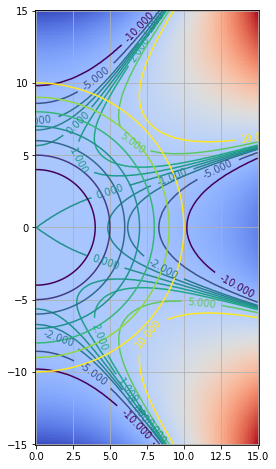

In [8]:
bdz = fp.ScalarField(bs0diff)
bdz.u *= 10000
newLevels = [-10, -5, -2, -1, 0, 1, 2, 5, 10]
rf = fp.ScalarField(bmag)
rf.u = np.sqrt(rf.x * rf.x + rf.y * rf.y)
fig,ax = fp.plt.subplots(figsize=[4,8])
cax = bdz.Cplot(newLevels, axpass=ax)
cax.grid(axis='both')
cax.contour(rf.x,rf.y,rf.u,levels=[4.0, 5.0,6,7,8,9,10])

Compared to HelmS0, we are definitely doing a little worse in the transverse direction. It is a little less clear what is happening along the axis.

To clarify this, look at the field magnitude along the axis and in the bisector plane (z=0).

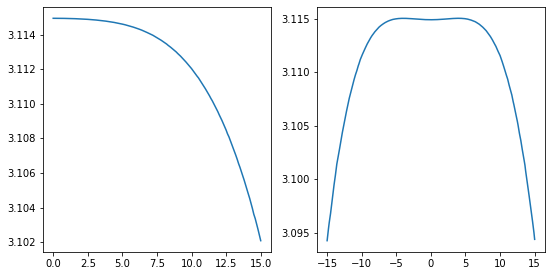

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[9,4.5])
fig.subplots_adjust(hspace=1.0)
axs[0].plot(bmag.x[150,:],bmag.u[150,:]*1e4)
axs[1].plot(bmag.y[:,0],bmag.u[:,0]*1e4)


Blow up the center 5cm and express as fractions of center field.

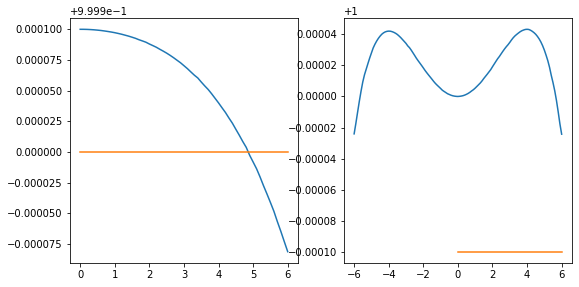

In [10]:
bline = np.zeros_like(bmag.u[150,0:61])
bline += 1-1e-4
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[9,4.5])
fig.subplots_adjust(hspace=1.0)
axs[0].plot(bmag.x[150,0:61],bmag.u[150,0:61]/B0)
axs[0].plot(bmag.x[150,0:61],bline)
axs[1].plot(bmag.y[90:211,0],bmag.u[90:211,0]/B0)
axs[1].plot(bmag.x[150,0:61],bline)

So we are gaining on the swings, but losing on the roundabouts. We are now good out to almost 7 cm on axis but only to 5 cm in the transverse plane.

Looking at the 45 degree regions of the contour plot suggest that we are now doing about as well as we can. The $10^{-4}$ lines come in nearly the same distance on the bisector plane as on the diagonals.